# 線形回帰 (liner regression)

In [1]:
# ライブラリの読み込み
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
rand = np.random

In [2]:
# ハイパーパラメータの設定
learning_rate = 0.01# 学習率(学習時の勾配降下法の学習する係数)
training_epochs = 1000 # トレーニング回数(1000回トレーニングをする)
display_step = 100 # 結果を表示数するステップ数(100トレーニング毎に結果を表示)

In [3]:
# トレーニングデータの作成
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0] # トレーニング数

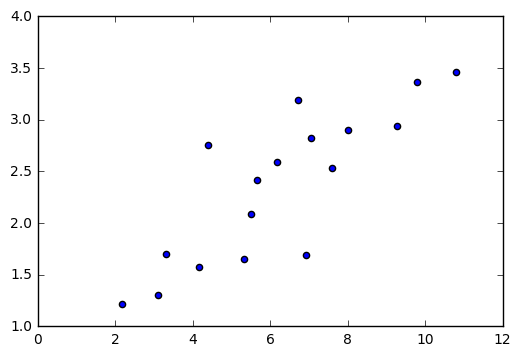

In [4]:
# トレーニングデータのプロット
plt.scatter(train_X, train_Y)

In [5]:
# グラフの入力 X, Y を定義
# (placeholderはSession内での実行時に値を設定できる)
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [6]:
# モデルの重みW とバイアスb の初期値を設定
# (VariableはSession内での実行時に値を更新する変数を格納する)
W = tf.Variable(rand.randn(), name="weight")
b  = tf.Variable(rand.randn(), name="bias")

In [7]:
# 線形モデルの定義
predict = tf.add(tf.mul(X, W), b) # predict = X * W + b

In [8]:
# 2乗和誤差 (mean squared error)
cost = tf.reduce_sum(tf.pow(predict - Y, 2)) / (2 * n_samples)

補足: 2乗和誤差(mean squared error)

$$
E = \frac {1}{2m} \sum_{i=1}^m (y_{pred_i} - y_i )^2
$$

In [9]:
# 勾配降下 (Gradient descent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
update = optimizer.minimize(cost)

In [10]:
# 変数の初期化(おきまり)
init = tf.initialize_all_variables() # たぶん、tf 0.12から global_variables_initializer()

In [11]:
# グラフを起動し、トレーニングを実施

# 結果を保持
hist = []

sess = tf.InteractiveSession()
sess.run(init)

for epoch in range(training_epochs): # エポック数(1000回)ループ
    for (x, y) in zip(train_X, train_Y): # すべてのトレーニングセットをループ
        sess.run(update, feed_dict={X: x, Y: y}) # placeholder X, Y  にデータをセットして勾配計算する

    # コストを保存

    # 現状のコストを表示
    if (epoch+1) % display_step == 0:
        cost_v, W_v, b_v = sess.run([cost, W, b], feed_dict={X: train_X, Y: train_Y})
        hist.append(cost_v)
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(cost_v), \
                  "W=", W_v, "b=", b_v)

print("最適化完了!")

Epoch: 0100 cost= 0.139536902 W= 0.389492 b= -0.204955
Epoch: 0200 cost= 0.125911504 W= 0.373346 b= -0.0888015
Epoch: 0300 cost= 0.115252167 W= 0.359064 b= 0.0139464
Epoch: 0400 cost= 0.106913455 W= 0.34643 b= 0.104836
Epoch: 0500 cost= 0.100390375 W= 0.335253 b= 0.185236
Epoch: 0600 cost= 0.095287822 W= 0.325367 b= 0.256356
Epoch: 0700 cost= 0.091296539 W= 0.316622 b= 0.319269
Epoch: 0800 cost= 0.088174745 W= 0.308886 b= 0.374921
Epoch: 0900 cost= 0.085733145 W= 0.302043 b= 0.42415
Epoch: 1000 cost= 0.083823621 W= 0.29599 b= 0.467697
最適化完了!


In [12]:
# 予測
predictions = sess.run(predict, feed_dict={ X: train_X })

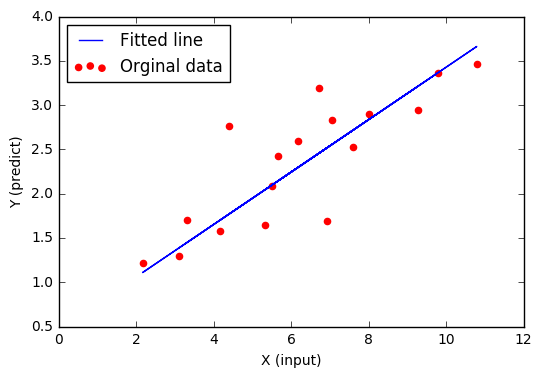

In [13]:
# データのプロットと線形回帰モデルのプロット
plt.scatter(train_X, train_Y, marker='o', color='r', label="Orginal data")
plt.plot(train_X, predictions, label="Fitted line")
plt.legend(loc='upper left')
plt.xlabel('X (input)')
plt.ylabel('Y (predict)')
plt.show()

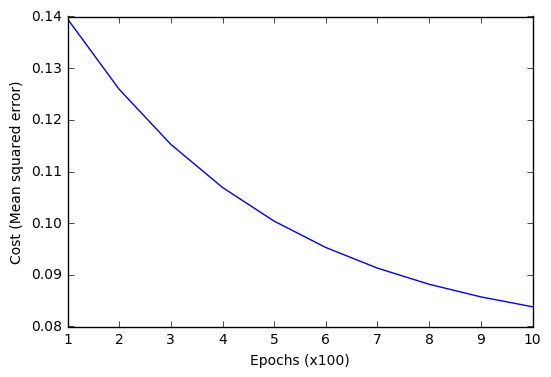

In [15]:
# 学習曲線のプロット
epochx100 = range(1, len(hist) + 1, 1)
plt.plot(epochx100, hist)
plt.xlabel('Epochs (x100)')
plt.ylabel('Cost (Mean squared error)')
plt.show()